In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

In [2]:
rate_df = pd.read_csv("insurance_numeric.csv")
rate_df.columns

Index(['Unnamed: 0', 'age', 'bmi', 'children', 'charges', 'sex_female',
       'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [3]:
rate_df = rate_df.drop(columns=['sex_female', 'smoker_no'])

In [4]:
rate_df.head()

,Unnamed: 0,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,4,32,28.880,0,3866.85520,1,0,0,1,0,0


In [5]:
np.mean(rate_df['charges'])

13270.422265141257

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <a list of 10 Patch objects>)

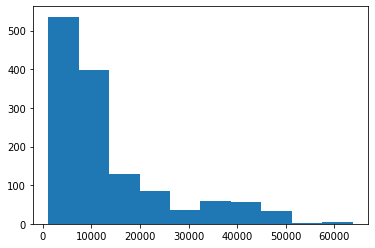

In [6]:
plt.hist(rate_df['charges'])

In [7]:
x = rate_df.drop(columns=['charges'])
y = rate_df['charges']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=1)

## Linear regression

In [9]:
lin = LinearRegression()
lin.fit(x_train, y_train)
pred_lin = lin.predict(x_test)

In [10]:
r2_score = lin.score(x_train, y_train)
print(r2_score)

0.7477713192347084


In [11]:
rmse_lin = np.sqrt(mean_squared_error(y_test, pred_lin))
rmse_lin

5955.324123534786

## DecisionTreeRegressor

In [12]:
reg = DecisionTreeRegressor(random_state=1)
reg.fit(x_train,y_train)
pred = reg.predict(x_test)

In [13]:
rmse_reg = np.sqrt(mean_squared_error(y_test, pred))
rmse_reg

6488.058907929585

## RandomForestRegressor

In [14]:
las = RandomForestRegressor(random_state=1)
las.fit(x_train, y_train)
pred2 = las.predict(x_test)

/home/joanna/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [15]:
rmse_las = np.sqrt(mean_squared_error(y_test, pred2))
rmse_las

4770.44007275686

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
params = {'n_estimators': [100, 250, 500],
         'max_features': [2, 4, 6, 'auto'],
         'max_depth': [3, 5],
         'criterion': ['mse', 'mae']}

In [18]:
from sklearn.metrics import make_scorer

def RMSE(true, pred):
    return np.sqrt(np.mean((true-pred)**2))

In [19]:
rmse_scorer = make_scorer(RMSE, greater_is_better = False)

In [20]:
grid = GridSearchCV(las, 
                    param_grid=params,
                   cv=5, 
                    verbose=10,
                   n_jobs = -1,
                   scoring = rmse_scorer)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  1

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth'

In [21]:
grid.best_params_

{'criterion': 'mse', 'max_depth': 5, 'max_features': 6, 'n_estimators': 500}

In [22]:
np.abs(grid.best_score_)

4587.857061985172

#### RMSE na zbiorze testowym

In [23]:
np.abs(rmse_scorer(grid.best_estimator_, x_test, y_test))

4350.274240591403

## XGBoost Regressor

In [24]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(x_train,y_train)
pred_xgb = xg_reg.predict(x_test)

[18:40:13] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:40:13] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [25]:
rmse_xg = np.sqrt(mean_squared_error(y_test, pred_xgb))
rmse_xg

10928.562096189675

## GradientBoostingRegressor

In [26]:
xgb2 = GradientBoostingRegressor()
xgb2.fit(x_train, y_train)
pred_xgb2 = xgb2.predict(x_test)

In [27]:
rmse_xgb2 = np.sqrt(mean_squared_error(y_test, pred_xgb2))
rmse_xgb2

4281.2403936483925